Задачи:
Сформулировать предположения и гипотезы для дальнейшего построения модели.
Проверить качество данных и очистить их, если это необходимо.
Определиться с параметрами модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 100)  # показывать больше строк
pd.set_option('display.max_columns', 100)  # показывать больше колонок

In [2]:
# Предоббработка
# Pstatus
def change_Pclass(x):
    if pd.isnull(x['Pstatus']):
        if x['famsize'] == 'GT3':
            x['Pstatus'] = 'T'
    return x
# traveltime


def fill_traveltime(x):
    if pd.isnull(x.traveltime) and x.reason == 'home':
        x.traveltime = 1
    return x
# Тестирование гипотез


def get_stat_dif(column):

    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            d1.append(column)
            break

In [3]:
# читаем файл
data = pd.read_csv('stud_math.xls')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Количественные признаки

## 1) score

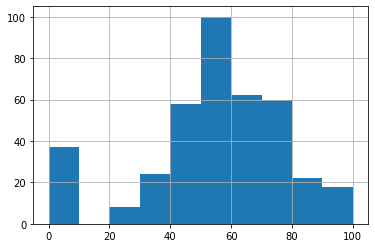

In [6]:
data['score'].hist()

In [7]:
# т.к score целевой столбец, удаляем пропущенные значения
data.drop(index=data[data.score.isnull()].index, inplace=True)

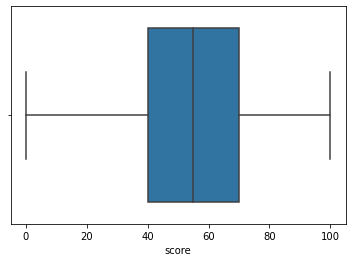

In [8]:
sns.boxplot(data['score'])

## 2) Age (возраст ученика (от 15 до 22))


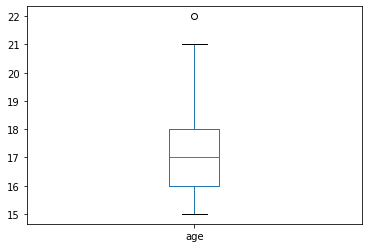

In [9]:
#Колонка заполнена полностью, есть один выброс с парнем 22 года
data.age.plot(kind='box')


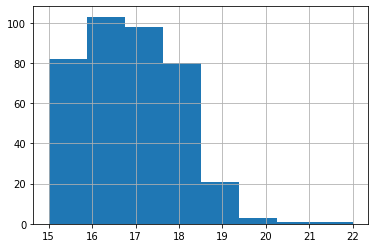

In [10]:
data.age.hist(bins=8)

In [11]:
#Данные выглядят адекватно, у ученика плохо со здоровьем, низкий ур образования у отца,матери, большая семья, пока оставим данную строку
data[data.age==22]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


## 3) absences — количество пропущенных занятий

In [12]:
data.absences.value_counts(dropna=False)

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

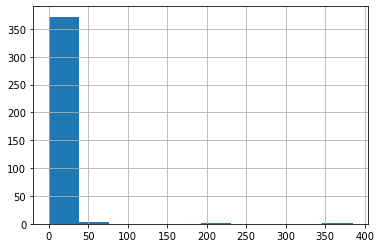

In [13]:
data.absences.hist()

In [14]:
IQR=data.absences.quantile(.75)-data.absences.quantile(.25)
low = data.absences.quantile(.25) - 1.5*IQR
high = data.absences.quantile(.75) + 1.5*IQR
low,high

(-12.0, 20.0)

In [15]:
data.absences = data.absences.apply(lambda x: x if low<=x<=high else None)

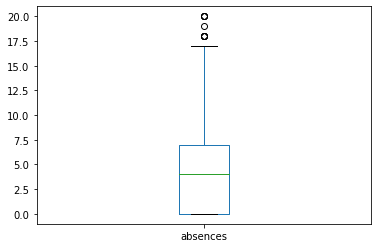

In [16]:
data.absences.plot(kind='box')

# Категориальные

## 4) school (аббревиатура школы, в которой учится ученик)


In [17]:
#Колонка заполнена полностью =)
data.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

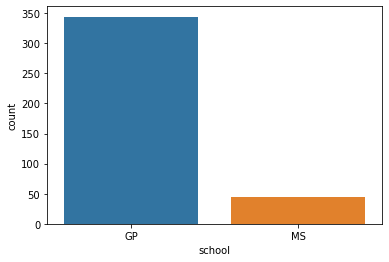

In [18]:
sns.countplot(data.school)

In [19]:
data[data['school']=='GP']['score'].mean(),\
data[data['school']=='MS']['score'].mean()

(52.63081395348837, 49.44444444444444)

## 5) Adress (тип адреса ученика ('U' - городской, 'R' - за городом))

In [20]:
# Попробуем посмотреть значения корреляции
data.address = data.address.apply(
    lambda x: 0 if x == 'U' else 1 if x == 'R' else None)

In [21]:
#17 пропущенных значений, как их заполнить пока непонятно
data.address.value_counts(dropna = False)

0.0    291
1.0     83
NaN     15
Name: address, dtype: int64

In [22]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,0.0,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,0.0,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,0.0,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,0.0,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,0.0,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,0.0,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,NaN,45.0
391,MS,M,17,0.0,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,1.0,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,1.0,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## 6)  Sex (Пол) 

In [23]:
# Колонка без пропусков
data.sex.value_counts(dropna=False)

F    204
M    185
Name: sex, dtype: int64

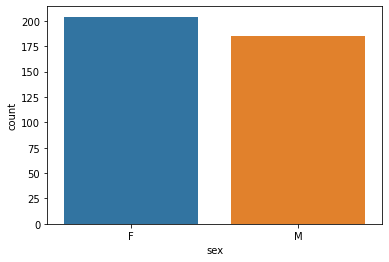

In [24]:
sns.countplot(data.sex)

In [25]:
# создадим новую колонку и удалим колонку sex
data['sex'] = data.sex.apply(lambda x: 1 if x=='F' else 0 if x=='M' else None)

In [26]:
data.columns = ['school',
                'is_female',
                'age',
                'address',
                'famsize',
                'Pstatus',
                'Medu',
                'Fedu',
                'Mjob',
                'Fjob',
                'reason',
                'guardian',
                'traveltime',
                'studytime',
                'failures',
                'schoolsup',
                'famsup',
                'paid',
                'activities',
                'nursery',
                'studytime, granular',
                'higher',
                'internet',
                'romantic',
                'famrel',
                'freetime',
                'goout',
                'health',
                'absences',
                'score']

## 7)  famsize размер семьи('LE3' <= 3, 'GT3' >3)

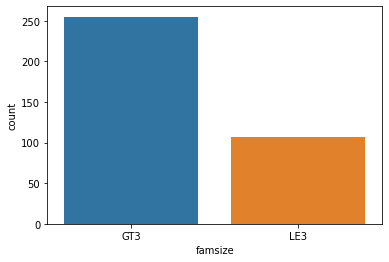

In [27]:
# К сожалению у меня нет предположений к заполнению None значений
sns.countplot(data.famsize)

In [28]:
data.famsize = data['famsize'].apply(lambda x: 0 if x=='LE3' else 1 if x=='GT3' else None)

## 8) Pstatus 

In [29]:
# В данной колонке есть пропуски, по логике если семья состоит из 3+ человек, то поставим значение в pstatus ='T'. 
#Тем более значений А относильно немного.
data.Pstatus.value_counts(dropna=False)

T      308
NaN     45
A       36
Name: Pstatus, dtype: int64

In [30]:
data.Pstatus = data.apply(change_Pclass, axis=1)['Pstatus']

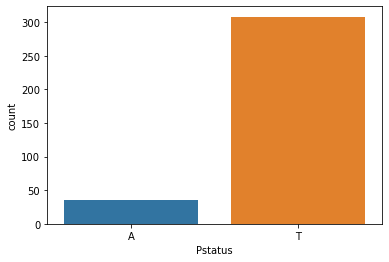

In [31]:
# В итоге имеем такой график(было 45 None, стало 17)

sns.countplot(data.Pstatus)

## 9) Medu (образование матери)

In [32]:
# 3nan значения т. к у этого показателя слишком большая корреляция удалим non значения их всего 3
data.Medu.value_counts(dropna=False),\
data.Medu.dropna(inplace=True)

(4.0    131
 2.0    100
 3.0     96
 1.0     56
 0.0      3
 NaN      3
 Name: Medu, dtype: int64,
 None)

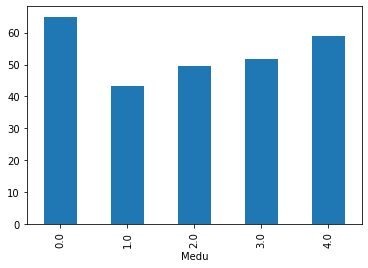

In [33]:
# Нужно помнить у большиснтво матерей имеет высшее образование,видна тенденция на увеличение кол-ва баллов с увеличением образования матери

data.groupby('Medu').mean().score.plot(kind='bar')

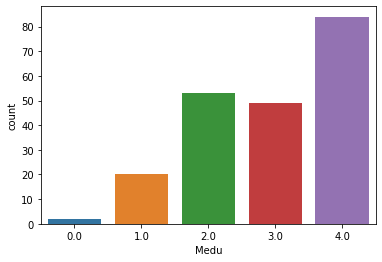

In [34]:
# Отфильтруем дата сет и посмотрим на распределение Medu
sns.countplot(data[data.score > data.score.mean()].Medu)
# Можно предположить что образование матери существенно влияет на оценку, будем иметь ввиду при построении модели

## 10) Fedu образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [35]:
# 24 none
# В данной колонке есть существенный выброс - 40(ошибка записи), может это опечатка (добавлен лишиний 0), а может и нет, удалим строку c индексом 11
data.drop(index=11, inplace=True)
# Выброс со значением 0 оставим т.к их всего 2 и при построении модели они вряд ли будут влиять

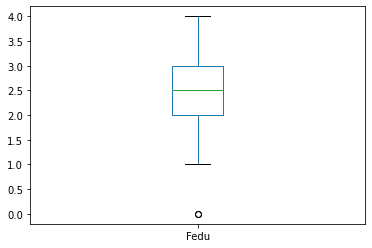

In [36]:
data.Fedu.plot(kind='box')

In [37]:
# удалим выбросы
data.drop(index=data[data.Fedu == 0].index, inplace=True)

In [38]:
data.Fedu.value_counts(dropna=False)

2.0    105
3.0     94
4.0     88
1.0     75
NaN     24
Name: Fedu, dtype: int64

## 11) Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)


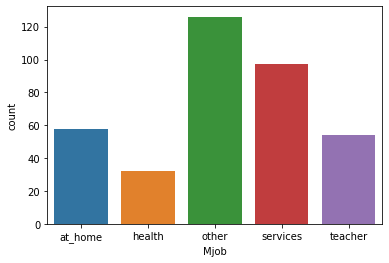

In [39]:
sns.countplot(data.Mjob)

In [40]:
data.Mjob.value_counts(dropna=False)

other       126
services     97
at_home      58
teacher      54
health       32
NaN          19
Name: Mjob, dtype: int64

 ## 12) Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
 

In [41]:
data.Fjob.value_counts(dropna=False)

other       191
services     99
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [42]:
# удалим строчку с nan у mjob &fjob
data.drop(index=data[(data.Fjob.isnull()) & (
    data.Mjob.isnull())].index, inplace=True)

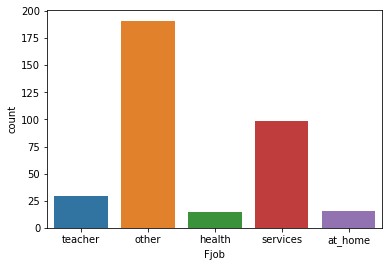

In [43]:
sns.countplot(data.Fjob)

## 13) reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)


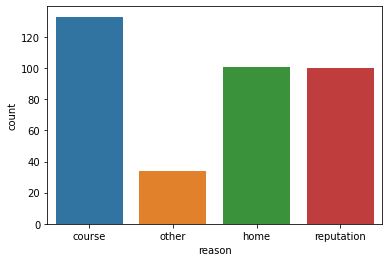

In [44]:
sns.countplot(data.reason)

In [45]:
data.reason.value_counts(dropna=False)

course        133
home          101
reputation    100
other          34
NaN            17
Name: reason, dtype: int64

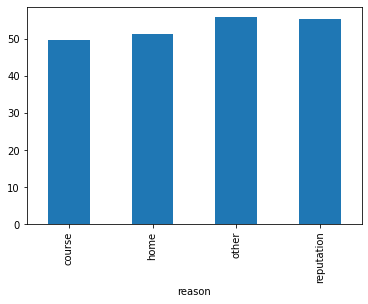

In [46]:
data.groupby(by='reason').mean()['score'].plot(kind='bar')

## 14)  guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [47]:
data.guardian.value_counts(dropna=False)

mother    245
father     85
NaN        31
other      24
Name: guardian, dtype: int64

In [48]:
data.groupby('guardian')['score'].mean()

guardian
father    53.352941
mother    52.387755
other     45.625000
Name: score, dtype: float64

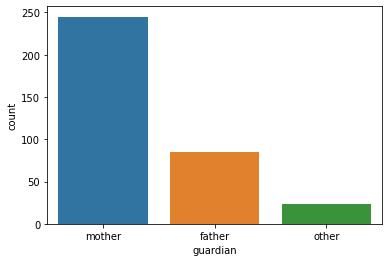

In [49]:
sns.countplot(data.guardian)

## 15) traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [50]:
data.traveltime.value_counts()

1.0    239
2.0     92
3.0     20
4.0      7
Name: traveltime, dtype: int64

In [51]:
#Отфильтруем данные с None в travel time и reason=home
data[(data['traveltime'].isnull()) & (data['reason']=='home')]

,school,is_female,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,0,15,0.0,1.0,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,0,15,0.0,1.0,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
234,GP,0,16,0.0,0.0,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0
310,GP,1,19,0.0,0.0,T,1.0,NaN,services,services,home,other,NaN,2.0,1.0,no,no,no,yes,no,-6.0,yes,no,yes,4.0,2.0,4.0,3.0,0.0,0.0
372,MS,1,17,NaN,1.0,T,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,no,no,no,yes,yes,-9.0,yes,no,NaN,3.0,4.0,3.0,3.0,8.0,55.0
384,MS,0,18,1.0,1.0,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,-3.0,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


In [52]:
# Присвоим значение 1 если reason==home
data = data.apply(fill_traveltime, axis=1)

In [53]:
data.traveltime.value_counts()

1.0    245
2.0     92
3.0     20
4.0      7
Name: traveltime, dtype: int64

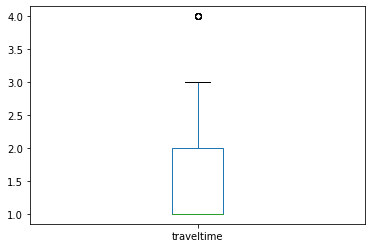

In [54]:
# В данных есть выброс, т.к значение выбросы выглядит адекватыным с точки зрения здравого смысла, то есть ничего с ним делать не будем
data.traveltime.plot(kind='box')

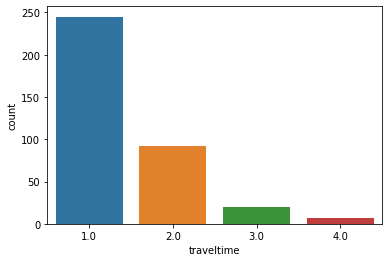

In [55]:
sns.countplot(data.traveltime)

## 16) studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [56]:
data.studytime.value_counts(dropna=False)

2.0    187
1.0    103
3.0     62
4.0     26
NaN      7
Name: studytime, dtype: int64

In [57]:
# studytime тоже неплохо на оценку итогового теста
data[data.studytime > data['studytime'].mean()]['score'].mean()

57.38636363636363

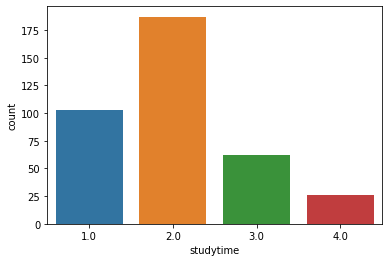

In [58]:
sns.countplot(data.studytime)

## 17) failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

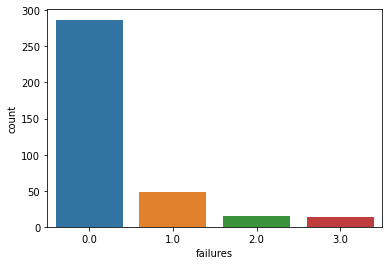

In [59]:
sns.countplot(data.failures)

In [60]:
data.failures.value_counts(dropna=False)

0.0    287
1.0     48
NaN     21
2.0     15
3.0     14
Name: failures, dtype: int64

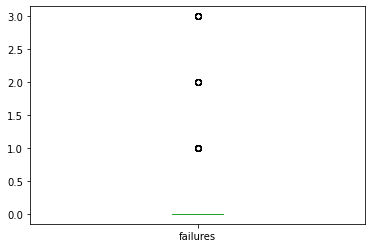

In [61]:
data.failures.plot(kind='box')

In [62]:
print('3 fail {} \n2 fail {}\n1 fail {}\n0 fail {}'.format(round(data[data.failures == 3].score.mean(), 0),
                                                           round(
                                                               data[data.failures == 2].score.mean(), 0),
                                                           round(
                                                               data[data.failures == 1].score.mean(), 0), 0),
      round(data[data.failures == 0].score.mean(), 0))

3 fail 30.0 
2 fail 32.0
1 fail 40.0
0 fail 0 56.0


In [63]:
# Можно преобразовать none значения в 0
data[data.failures.isnull()].mean()

is_female               0.380952
age                    16.285714
address                 0.285714
famsize                 0.764706
Medu                    3.142857
Fedu                    2.833333
traveltime              1.526316
studytime               1.900000
failures                     NaN
studytime, granular    -5.700000
famrel                  4.238095
freetime                3.250000
goout                   3.238095
health                  3.526316
absences                3.444444
score                  55.952381
dtype: float64

In [64]:
# так как это очень важный показатель, который сильно влияет на результат, удалять выбросы не имеет смысла
#None значений 21, мне кажется это слишком много
data[['failures', 'score']].corr()

,failures,score
failures,1.000000,-0.343553
score,-0.343553,1.000000


In [65]:
data.groupby('failures')['score'].mean()

failures
0.0    55.975610
1.0    40.000000
2.0    32.333333
3.0    29.642857
Name: score, dtype: float64

## 18) schoolsup — дополнительная образовательная поддержка (yes или no)


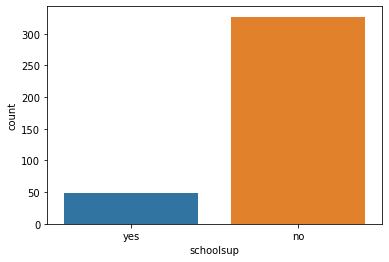

In [66]:
sns.countplot(data.schoolsup)

In [67]:
data.schoolsup = data.schoolsup.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

In [68]:
data.groupby('schoolsup')['score'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
schoolsup,,,,
0.0,52.951070,24.003273,0.0,100.0
1.0,47.040816,14.610155,0.0,85.0


## 19) famsup — семейная образовательная поддержка (yes или no)

In [69]:
data.famsup.value_counts(dropna=False)

yes    214
no     134
NaN     37
Name: famsup, dtype: int64

In [70]:
# можно предположить что в больших семьях велик шанс поддержки
data.groupby('famsup').score.mean()

famsup
no     52.089552
yes    51.542056
Name: score, dtype: float64

In [71]:
data.famsup = data.famsup.apply(lambda x : 1 if x=='yes' else 0 if x=='no' else None)

In [72]:
def schoolfamsup(x):
    if x.schoolsup ==1 and x.famsup==1:
        x['scholfamsup']=1
    else:
        x['scholfamsup']=0
    return x
    
        

In [73]:
data['scholfamsup'] = data.apply(schoolfamsup,axis=1)['scholfamsup']

## 20) paid — дополнительные платные занятия по математике (yes или no)

In [74]:
data.paid.value_counts(dropna=False)#40nan
#data.groupby('paid')['score'].mean()

no     194
yes    152
NaN     39
Name: paid, dtype: int64

In [75]:
data.paid = data.paid.apply(lambda x : 1 if x=='yes' else 0 if x=='no' else None)

In [76]:
data.groupby('paid')['score'].mean()

paid
0.0    50.154639
1.0    54.835526
Name: score, dtype: float64

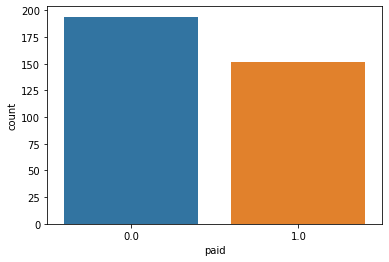

In [77]:
sns.countplot(data.paid)

## 21) activities — дополнительные внеучебные занятия (yes или no)

In [78]:
data.activities.value_counts(dropna=False)

yes    189
no     182
NaN     14
Name: activities, dtype: int64

In [79]:
data.activities = data.activities.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

In [80]:
# ого разницы практически нет
data.groupby('activities')['score'].mean()

activities
0.0    52.032967
1.0    52.513228
Name: score, dtype: float64

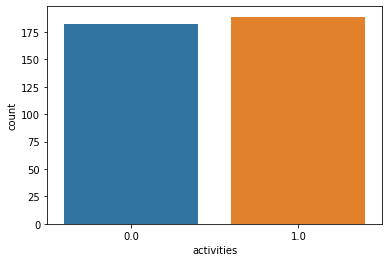

In [81]:
sns.countplot(data.activities)

## 22) nursery — посещал детский сад (yes или no)

In [82]:
data.groupby('nursery')['score'].mean()

nursery
no     50.000000
yes    52.764505
Name: score, dtype: float64

In [83]:
data.nursery = data.nursery.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

In [84]:
data

,school,is_female,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,scholfamsup
0,GP,1,18,0.0,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,0
1,GP,1,17,0.0,1.0,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,0
2,GP,1,15,0.0,0.0,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,0
3,GP,1,15,0.0,1.0,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0
4,GP,1,16,0.0,1.0,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,0,20,0.0,0.0,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,-6.0,yes,no,no,5.0,5.0,4.0,4.0,NaN,45.0,0
391,MS,0,17,0.0,0.0,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0,0
392,MS,0,21,1.0,1.0,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0,0
393,MS,0,18,1.0,0.0,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0,0


# studytime, granular

In [85]:
data.drop(columns='studytime, granular', inplace=True)

## 23) higher — хочет получить высшее образование (yes или no)

In [86]:
data.higher.value_counts(dropna=False)

yes    348
no      19
NaN     18
Name: higher, dtype: int64

In [87]:
# ого очень большая разница
data.groupby('higher')['score'].mean()

higher
no     33.684211
yes    53.002874
Name: score, dtype: float64

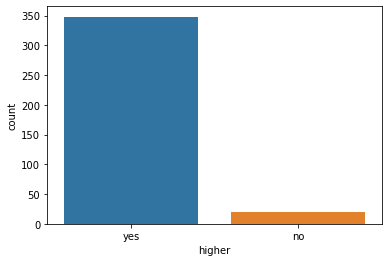

In [88]:
sns.countplot(data.higher)

In [89]:
data.higher = data.higher.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

## 24) internet — наличие интернета дома (yes или no)


In [90]:
data.internet.value_counts(dropna=False)

yes    296
no      55
NaN     34
Name: internet, dtype: int64

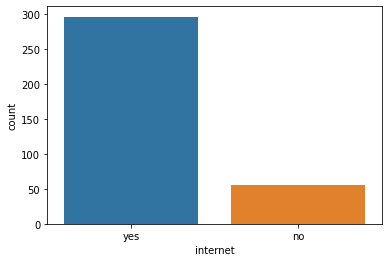

In [91]:
sns.countplot(data.internet)

In [92]:
data.internet = data.internet.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

In [93]:
data.groupby('internet')['score'].mean()

internet
0.0    49.090909
1.0    52.922297
Name: score, dtype: float64

## 25) romantic — в романтических отношениях (yes или no)

In [94]:
data.romantic.value_counts(dropna=False)

no     232
yes    122
NaN     31
Name: romantic, dtype: int64

In [95]:
data.groupby('romantic')['score'].mean()

romantic
no     54.461207
yes    47.418033
Name: score, dtype: float64

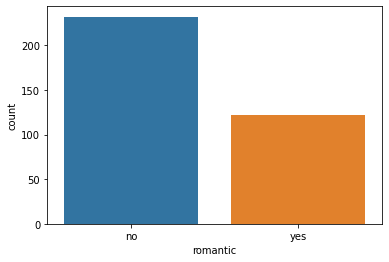

In [96]:
sns.countplot(data.romantic)

In [97]:
data.romantic = data.romantic.apply(
    lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

## 26 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [98]:
data.famrel.value_counts(dropna=False)

 4.0    176
 5.0     96
 3.0     61
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [99]:
#видим опечатку, удалим строку, потому что данные некорректны. Также удалим строки с 1, потому что их слишком мало

In [100]:
data.drop(index=data[data.famrel == -1].index, inplace=True)
data.drop(index=data[data.famrel == 1].index, inplace=True)

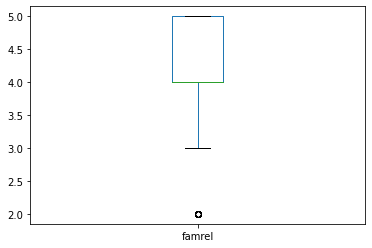

In [101]:
data.famrel.plot(kind='box')

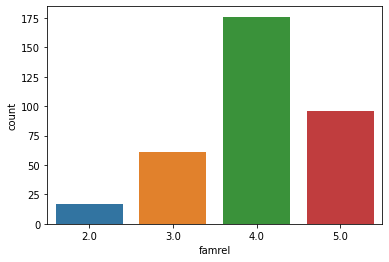

In [102]:
# как классно, что у большинства семей все хорошо
sns.countplot(data.famrel)

In [103]:
data.groupby('famrel')['score'].mean()

famrel
2.0    48.529412
3.0    51.475410
4.0    51.250000
5.0    54.843750
Name: score, dtype: float64

## 27) freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [104]:
data.freetime.value_counts(dropna=False)

3.0    148
4.0    108
2.0     58
5.0     37
1.0     17
NaN      9
Name: freetime, dtype: int64

In [105]:
data[data['score'] > data['score'].mean()].describe()

,is_female,age,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,scholfamsup
count,199.000000,199.000000,188.000000,189.000000,199.000000,186.000000,188.000000,194.000000,187.000000,196.000000,177.000000,181.000000,193.000000,191.000000,190.000000,180.000000,180.000000,185.000000,192.000000,196.000000,194.000000,184.000000,199.000000,199.000000
mean,0.492462,16.522613,0.175532,0.693122,2.914573,2.693548,1.345745,2.108247,0.106952,0.091837,0.604520,0.453039,0.518135,0.780105,0.978947,0.861111,0.316667,4.021622,3.260417,2.959184,3.551546,4.423913,68.391960,0.045226
std,0.501204,1.213660,0.381437,0.462423,1.062558,1.064240,0.596454,0.865956,0.342829,0.289535,0.490341,0.499171,0.500971,0.415264,0.143939,0.346795,0.466474,0.833776,1.010363,1.061381,1.443198,4.733865,11.334097,0.208324
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,60.000000,0.000000
50%,0.000000,16.000000,0.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.000000,65.000000,0.000000
75%,1.000000,17.000000,0.000000,1.000000,4.000000,4.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,6.000000,75.000000,0.000000
max,1.000000,20.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000,1.000000


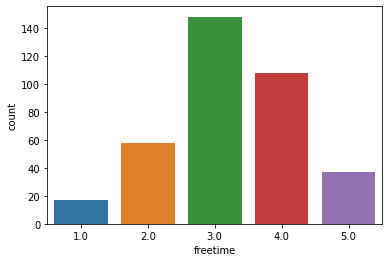

In [106]:
sns.countplot(data.freetime)

## 28) goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [107]:
data.goout.value_counts(dropna=False)

3.0    122
2.0     95
4.0     81
5.0     50
1.0     22
NaN      7
Name: goout, dtype: int64

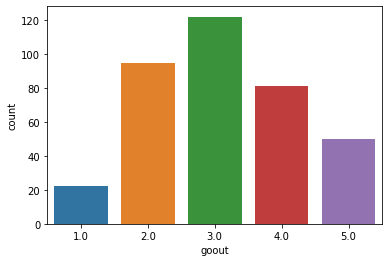

In [108]:
sns.countplot(data.goout)

## 29 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [109]:
data.health.value_counts(dropna=False)

5.0    133
3.0     86
4.0     59
2.0     42
1.0     42
NaN     15
Name: health, dtype: int64

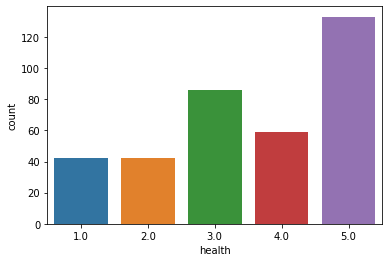

In [110]:
sns.countplot(data.health)

In [111]:
data.groupby('health')['score'].mean()

health
1.0    58.809524
2.0    52.619048
3.0    50.174419
4.0    50.677966
5.0    52.443609
Name: score, dtype: float64

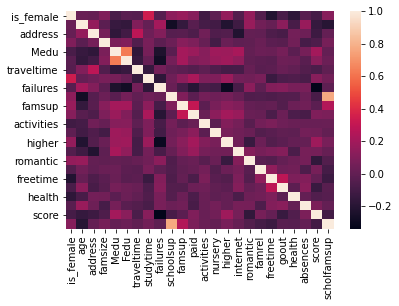

In [112]:
sns.heatmap(data.corr())

In [113]:
d1 = list(data.corr().iloc[-2][np.abs(data.corr().iloc[-2]) >= 0.1].index)
d1.remove('score')

In [114]:
#Качественные столбцы
lst2=[]
for i in data.columns:
    if i not in data.corr().index:
        lst2.append(i)

In [115]:
for col in lst2:
    get_stat_dif(col)


Найдены статистически значимые различия для колонки Mjob


In [116]:
#Таблица для модели (финальная)
data[d1]

,age,address,Medu,Fedu,studytime,failures,higher,romantic,goout,scholfamsup,Mjob
0,18,0.0,4.0,4.0,2.0,0.0,1.0,0.0,4.0,0,at_home
1,17,0.0,1.0,1.0,2.0,0.0,1.0,0.0,3.0,0,at_home
2,15,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0,at_home
3,15,0.0,4.0,2.0,3.0,0.0,1.0,1.0,2.0,0,health
4,16,0.0,3.0,3.0,2.0,0.0,1.0,0.0,2.0,0,other
...,...,...,...,...,...,...,...,...,...,...,...
390,20,0.0,2.0,2.0,2.0,2.0,1.0,0.0,4.0,0,services
391,17,0.0,3.0,1.0,1.0,0.0,1.0,0.0,5.0,0,services
392,21,1.0,1.0,1.0,1.0,3.0,NaN,0.0,3.0,0,other
393,18,1.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0,services


Таким образом получилось 10 колонок для построения модели.
Самые важные колонки это образование матери Medu(так же влияет на важную колонку Fedu, умные женщины выбирают умных мужчин, это очень сильно сказывается на оценке ученика) и кол-во внеучебных неудач failers и желание получить высшее образование у студента(студент хочет учиться, поэтому он старается получить максимальный балл).